# **Breast Cancer Prediction**

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [6]:

import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))


In [7]:
#displaying first five rows
df.head

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [8]:
#shape of the data frame
df.shape

(569, 33)

In [9]:
#concise summery of data frame
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [10]:
#column names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [11]:
#checking for null values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
#dropping 32 column
df.drop("Unnamed: 32",axis=1, inplace=True)

In [13]:
#descriptive statistics of data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: xlabel='diagnosis', ylabel='count'>

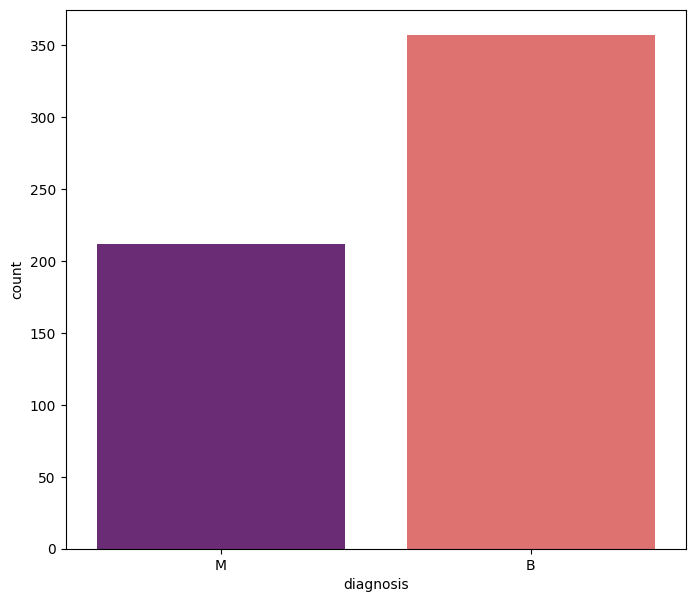

In [14]:
#count plot
plt.figure(figsize=(8,7))
sns.countplot(x="diagnosis",data=df,palette='magma')

<ipython-input-15-9faac2f7b3e3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=.5,cmap="Purples")


<Axes: >

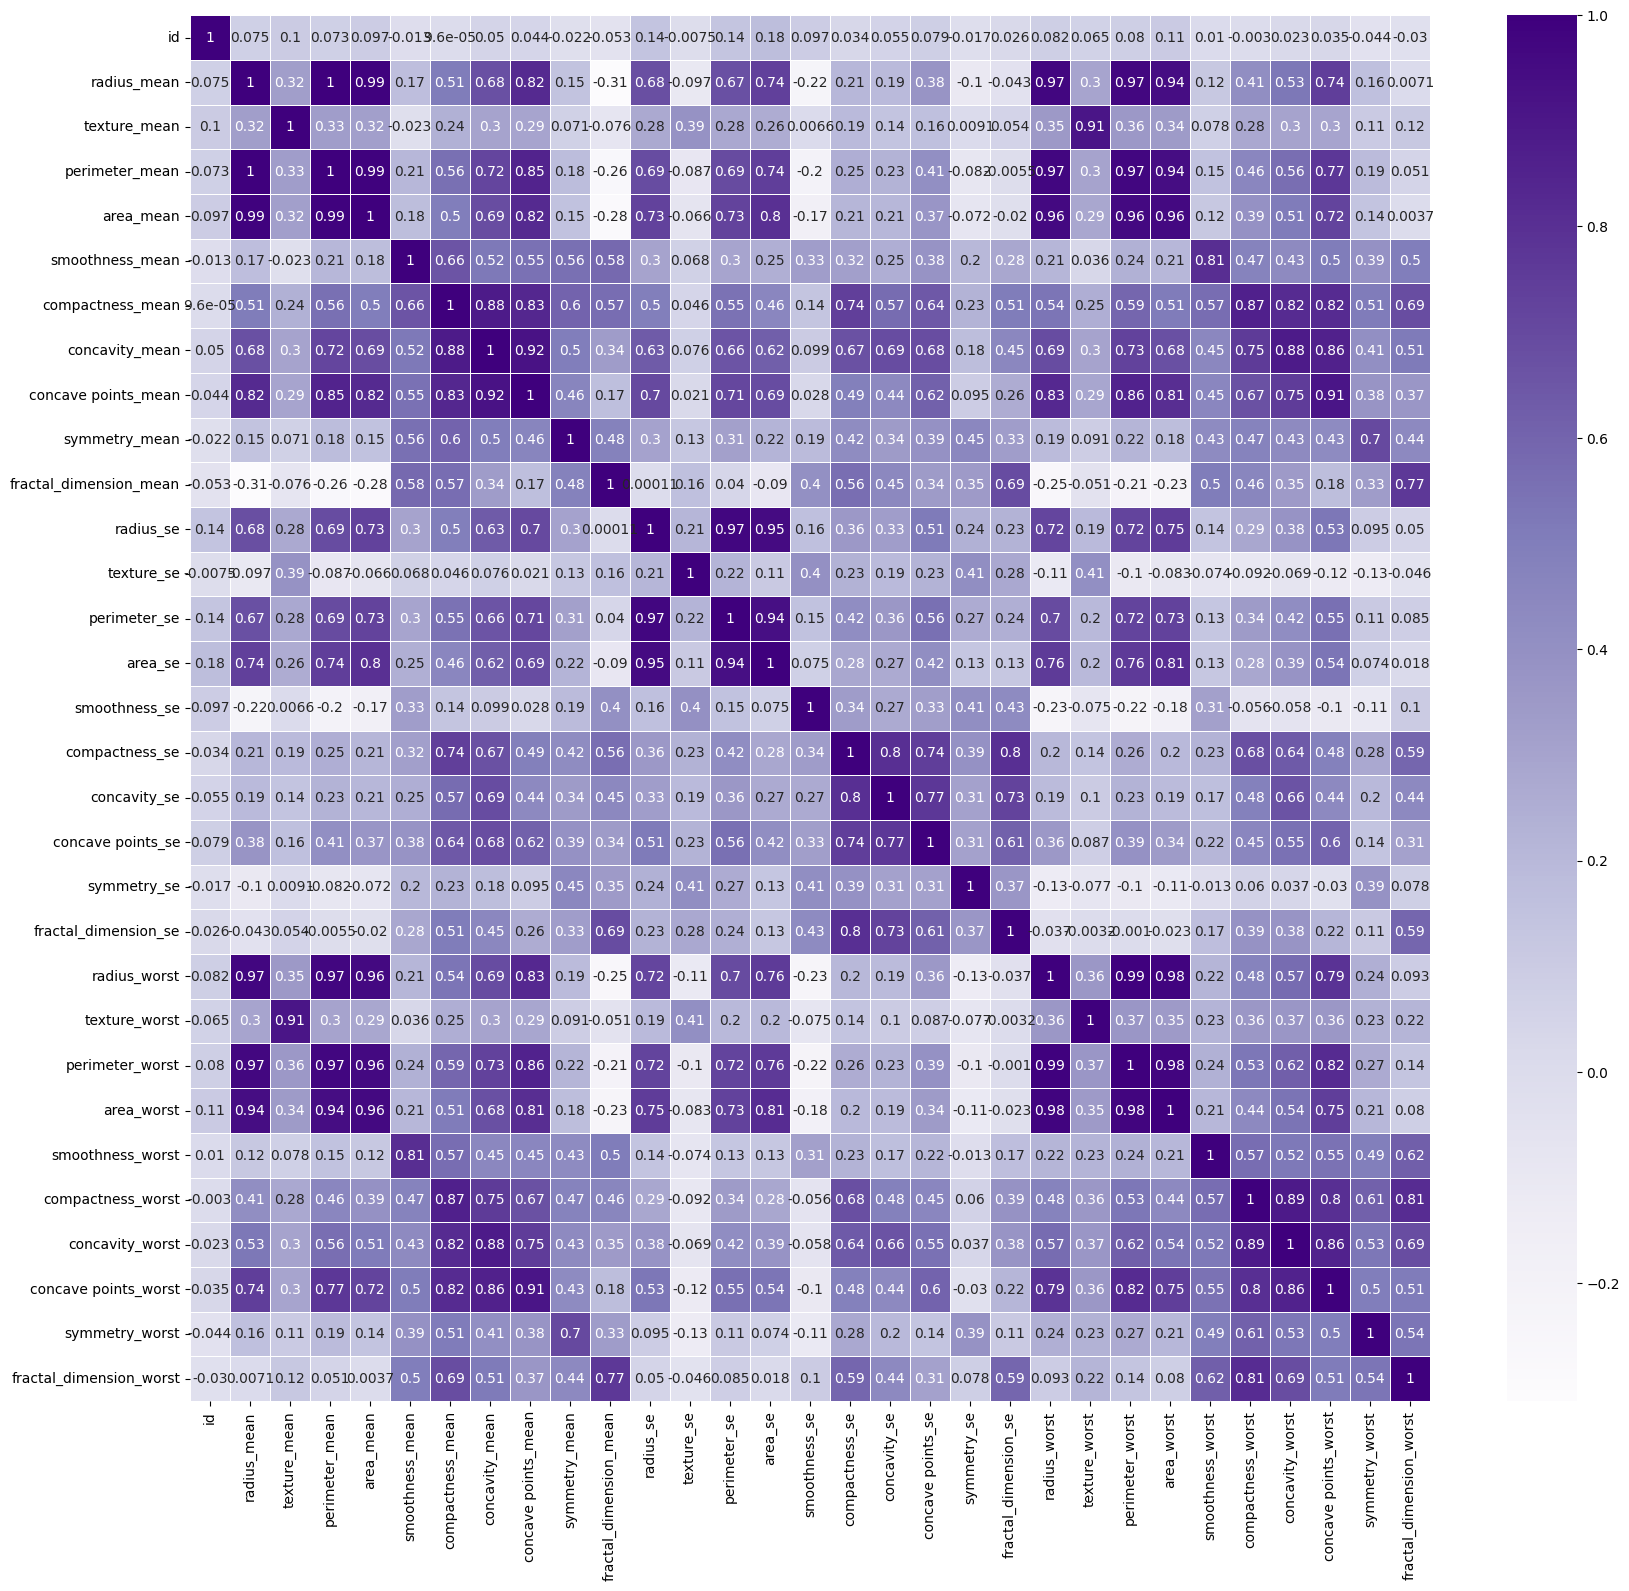

In [15]:
#heatmap
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True,linewidths=.5,cmap="Purples")

In [16]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
#getting mean columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
#getting se column with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']
#getting worst column with diagnosis
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [18]:
#pairplot for mean columns
sns.pairplot(df[m_col], hue='diagnosis', palette='Blues')

Output hidden; open in https://colab.research.google.com to view.

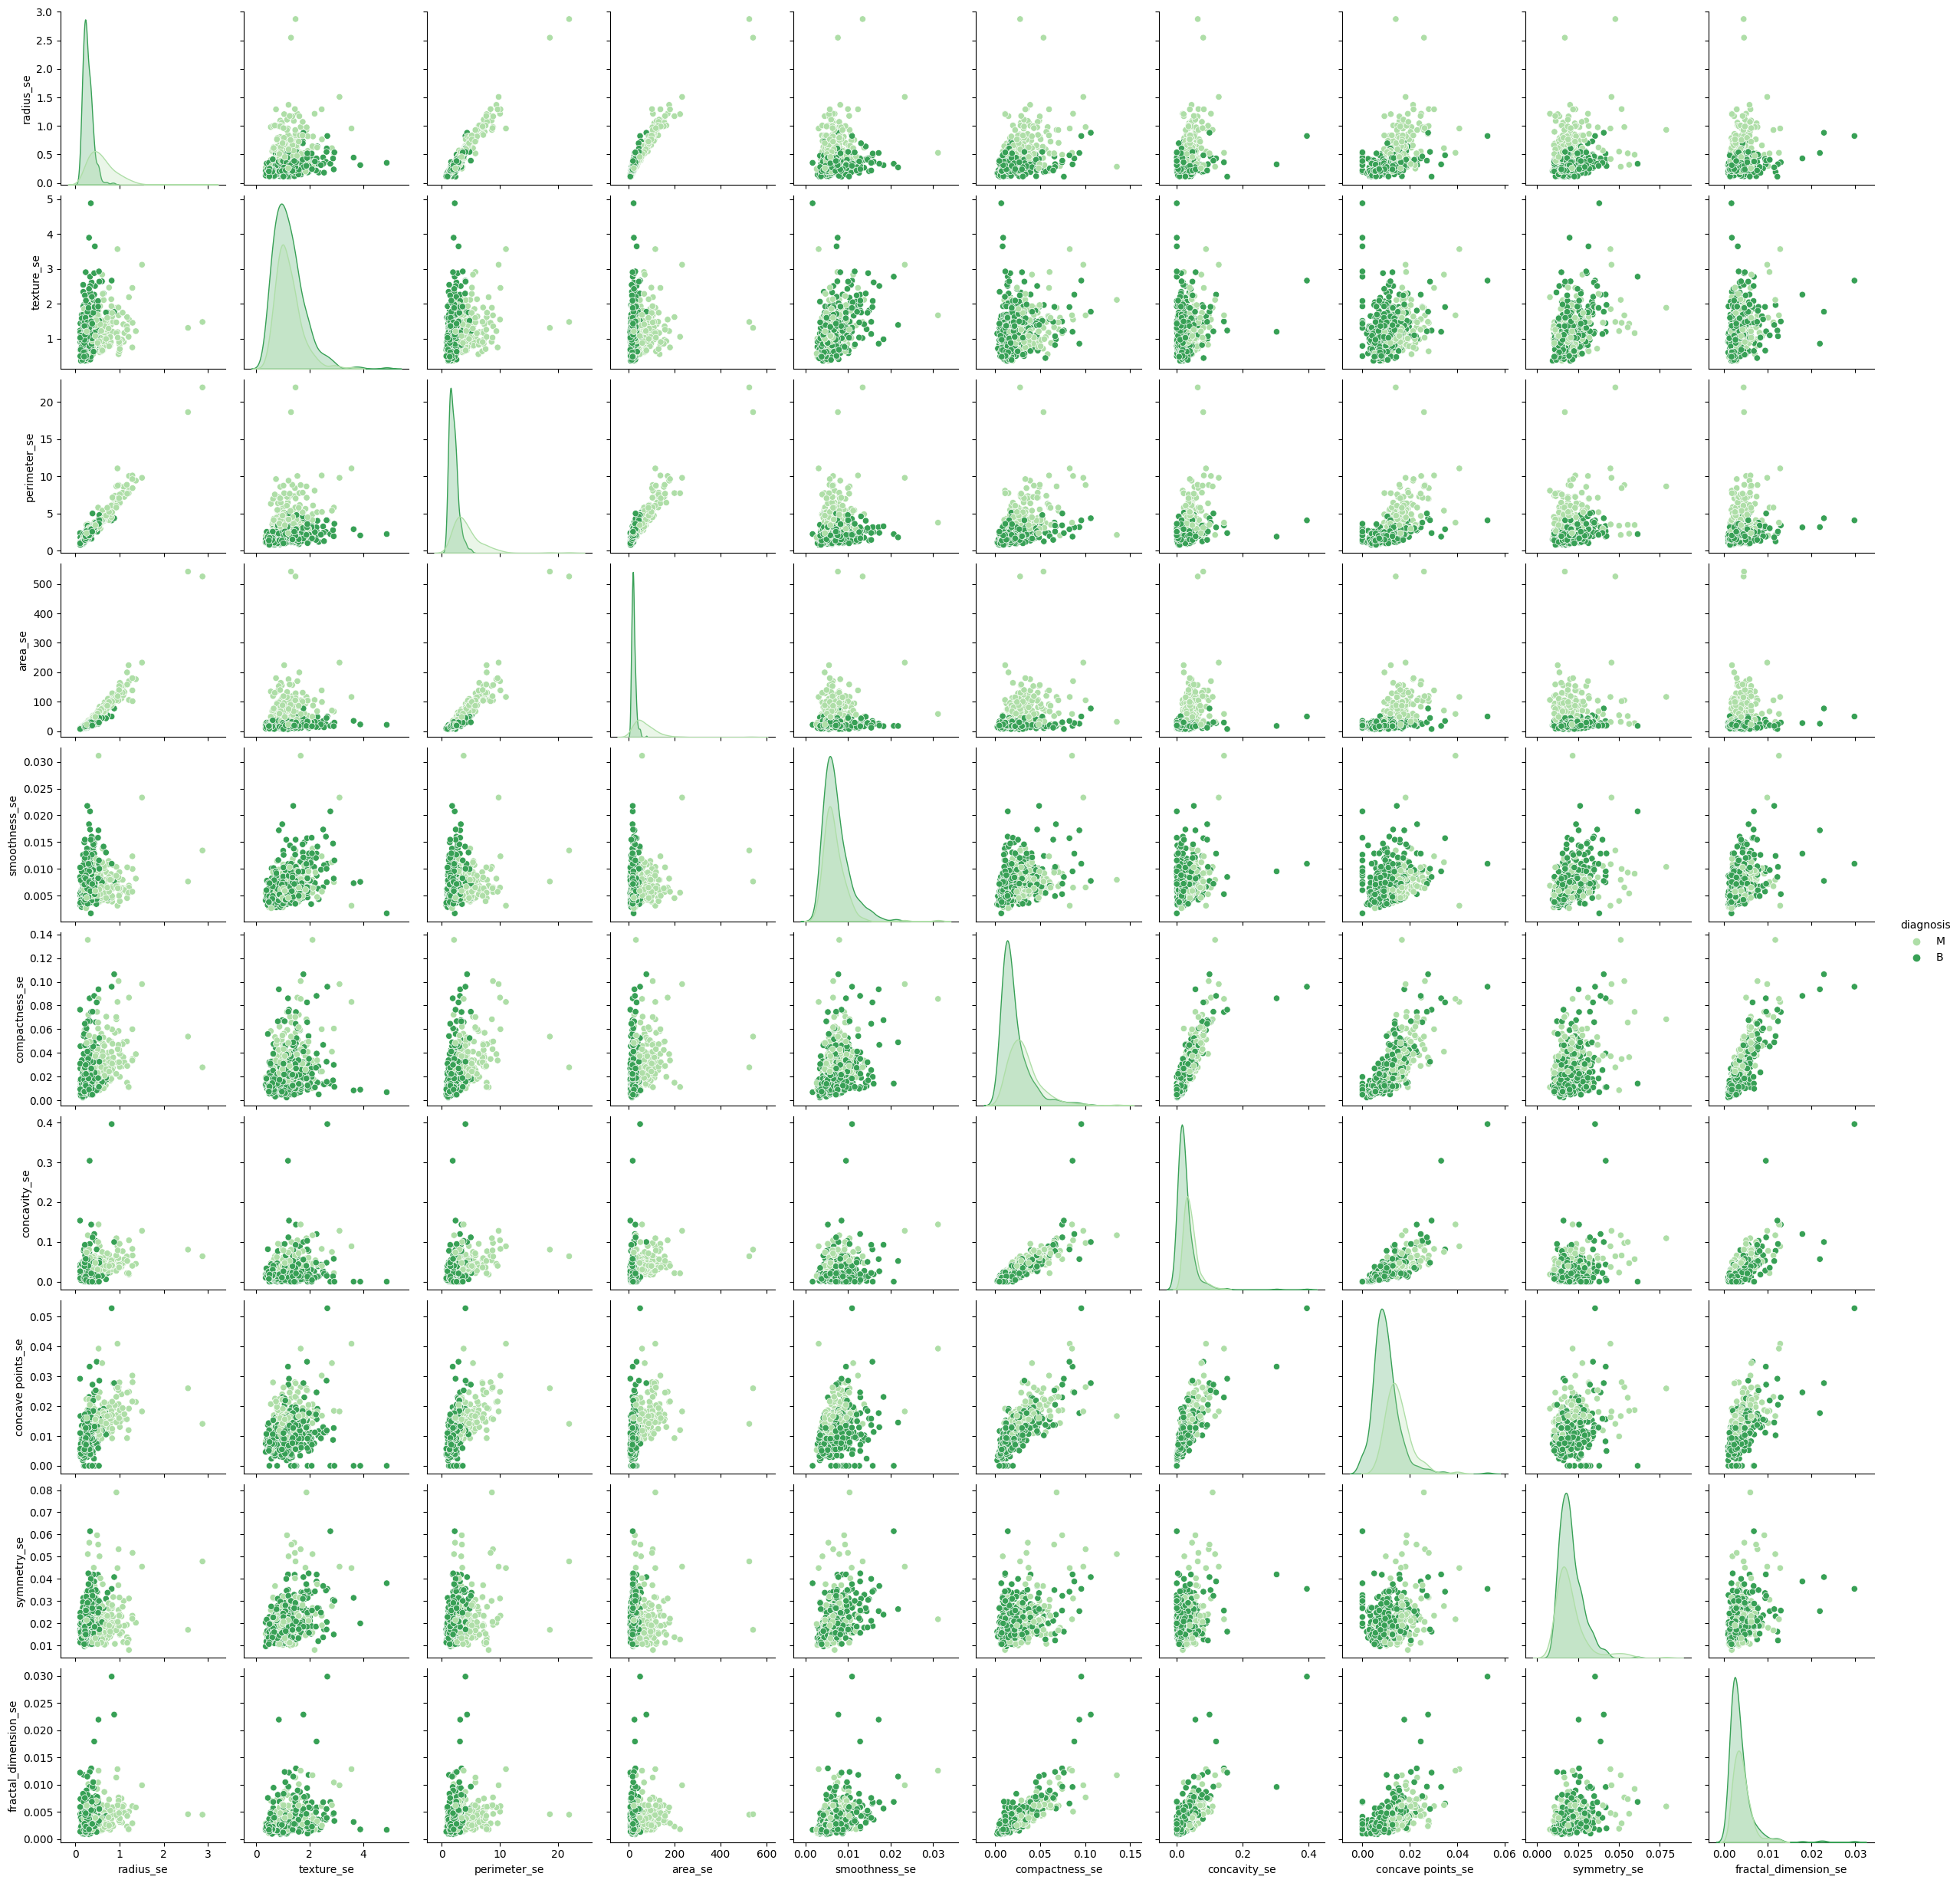

In [19]:
sns.pairplot(df[s_col], hue='diagnosis', palette='Greens')

In [20]:
sns.pairplot(df[w_col], hue='diagnosis', palette='Oranges')

Output hidden; open in https://colab.research.google.com to view.

In [21]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [22]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [23]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)


Shape of training set: (455, 31)
Shape of test set: (114, 31)


In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
predictions1=logreg.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1))
print('\n')
print(classification_report(y_test, predictions1))


Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [28]:
from sklearn.metrics import accuracy_score
logreg_acc=accuracy_score(y_test,predictions1)
print("Accuracy of the Logistic Regression Model is:",logreg_acc)

Accuracy of the Logistic Regression Model is: 0.9824561403508771


K Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
#to find which value shows the lowest mean error
error_rate=[]

for i in range(1,42):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

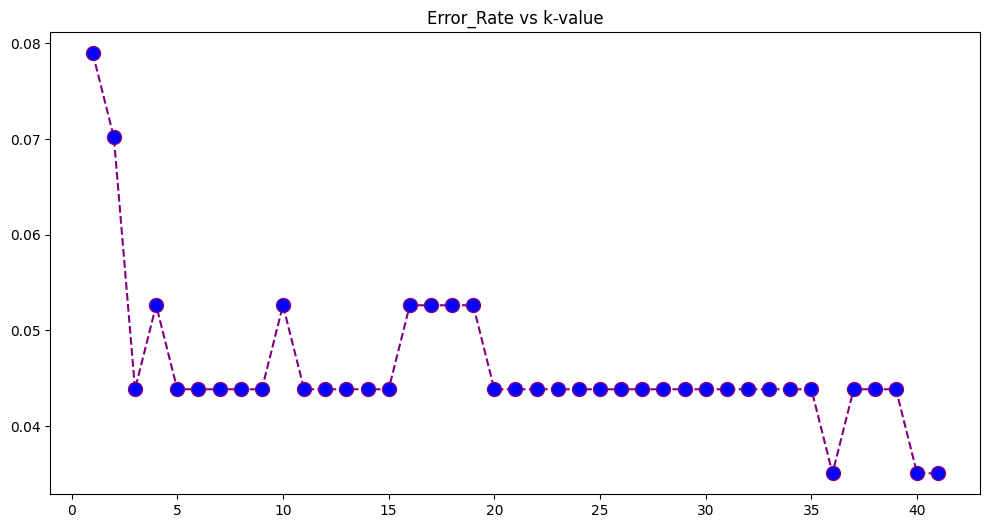

In [31]:
plt.figure(figsize=(12,6))
plt.plot(range(1,42),error_rate,color='purple',linestyle='--',marker='o',markersize=10,markerfacecolor='b')

plt.title('Error_Rate vs k-value')
plt.show()

In [32]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
predictions2=knn.predict(X_test)

In [33]:
print(confusion_matrix(y_test,predictions2))
print("\n")
print(classification_report(y_test,predictions2))

[[69  2]
 [ 3 40]]


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [34]:
knn_model_acc=accuracy_score(y_test,predictions2)
print("Accuracy of KNeighborsClassifier Model is:",knn_model_acc)

Accuracy of KNeighborsClassifier Model is: 0.956140350877193


Random Forests

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
predictions4=rfc.predict(X_test)

In [37]:
print("Confusion M0atrix: \n",confusion_matrix(y_test,predictions4))
print("\n")
print(classification_report(y_test,predictions4))

Confusion M0atrix: 
 [[70  1]
 [ 3 40]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [38]:
rfc_acc=accuracy_score(y_test,predictions4)
print("Accuracy of Random Forest Model is:",rfc_acc)

Accuracy of Random Forest Model is: 0.9649122807017544


Support Vector Machines(SVM)

In [39]:
from sklearn.svm import SVC
svc_model=SVC(kernel="rbf")
svc_model.fit(X_train,y_train)
predictions5=svc_model.predict(X_test)

In [40]:
print("Confusion M0atrix: \n",confusion_matrix(y_test,predictions5))
print("\n")
print(classification_report(y_test,predictions5))

Confusion M0atrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [41]:
svm_acc=accuracy_score(y_test,predictions5)
print("Accuracy of SVM Model is:",svm_acc)

Accuracy of SVM Model is: 0.9824561403508771


Result

In [42]:
print(logreg_acc)
print(knn_model_acc)
print(rfc_acc)
print(svm_acc)

0.9824561403508771
0.956140350877193
0.9649122807017544
0.9824561403508771


<Axes: >

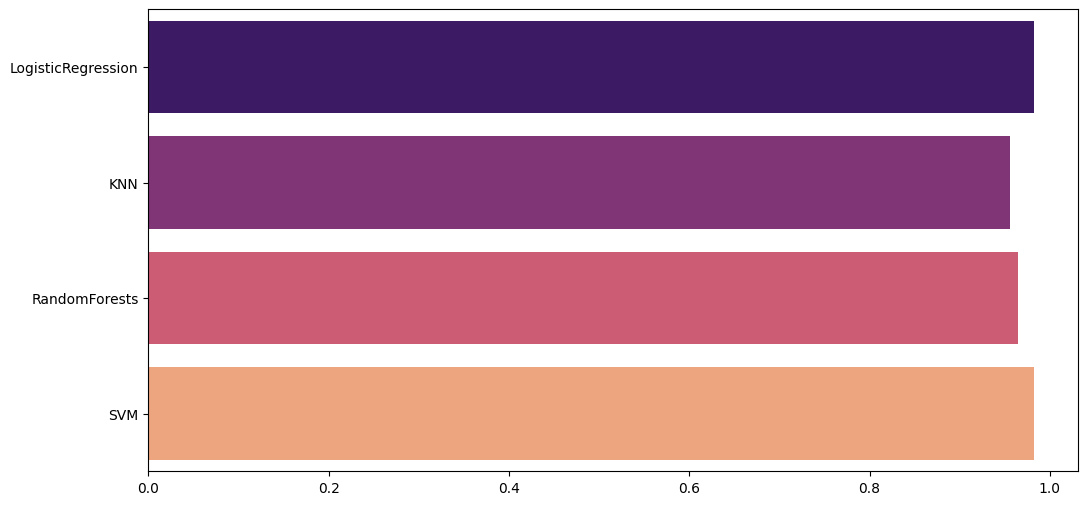

In [44]:
, LogisticRegressionCV
plt.figure(figsize=(12,6))
model_acc=[logreg_acc,knn_model_acc,rfc_acc,svm_acc]
model_name=['LogisticRegression','KNN','RandomForests','SVM']
sns.barplot(x=model_acc,y=model_name,palette='magma')

Logistic Regression model and SVM model gave best performance with an accuracy of 98.24%